# Linear regression
- It's a way to model relationship between 2 models
- Also known as the slope formula
- equation form: \begin{align}Y = a + bX\end{align}
  - where X is the independent variable and Y is dependent
  - b = slope
  - a = y-intercept

#### Equations
\begin{align}
a = \dfrac{(\sum y)(\sum x^2)-(\sum x)(\sum xy)}{n(\sum x^2) - (\sum x)^2}
\end{align}

\begin{align}
b = \dfrac{n(\sum xy)-(\sum x)(\sum y)}{n(\sum x^2) - (\sum x)^2}
\end{align}


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
path = os.getcwd() + '\data\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


> Let's plot it together to get a better idea of what the data looks like

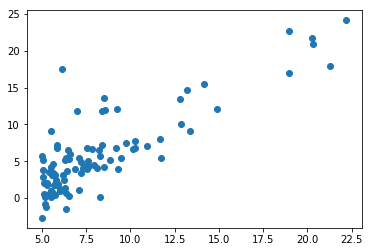

In [4]:
plt.scatter(x=data['Population'], y=data['Profit'])
plt.show()

> Implementing linear regression using gradient descent to minimize cost function

> Creating a function to compute the cost of a given solution

In [5]:
def compute_cost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Inserting a column of ones to use a vectorized solution to computing cost and gradients.

In [6]:
data.insert(0, 'Ones', 1)

Checking the new table

In [7]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


Variable initialization

In [8]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

Checking values

In [9]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Convert to numpy matrices

In [11]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [12]:
theta

matrix([[0, 0]])

Shape of matrices

In [13]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

Compute cost for initial solution (0 values for theta)

In [14]:
compute_cost(X, y, theta)

32.072733877455676

---
Defining a function to perform gradient descent on paramaters theta using the update rules defined in the text

In [15]:
def gradient_descent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = compute_cost(X, y, theta)
        
    return theta, cost

Init some additional variables: learning rate $\alpha$ (alpha), and number of iterations to perform

In [16]:
alpha = 0.01
iters = 1000

Running the gradient descent algo to ift our parameters theta to the training set

In [17]:
g, cost = gradient_descent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

Now we can compute our cost (error) of trained model using our fitted parameters.

In [18]:
compute_cost(X, y, g)

4.5159555030789118

Let's plot the linear model along with the data to see how it fits

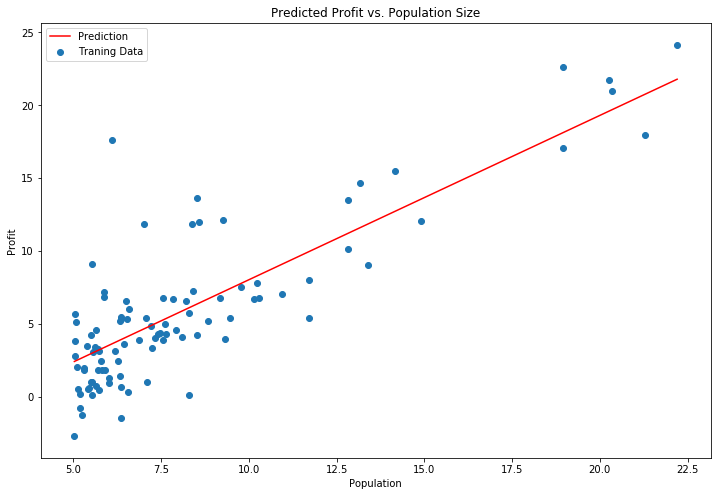

In [19]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
fig

Observations:
- The cost always decreases. This is an example of convex optimization problem
- function outputs a vector with the cost at each iteration, so we can plot that as well

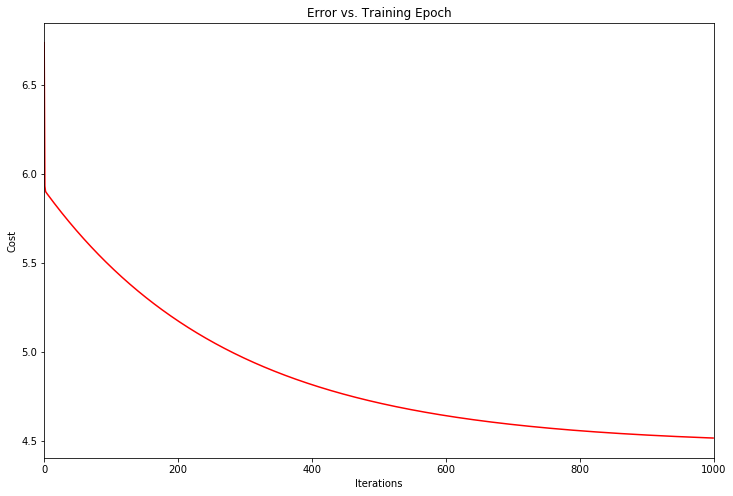

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_xlim([0, iters])
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
fig

---
# Mulitple variables
---

Let's try 2 variables. 

Example: a housing price data set with 2 variables 
- size of house, no. of bedrooms and 
- target price of house.

In [21]:
path = os.getcwd() + '\data\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


> add another step: normalizing the features

In [22]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Repeating steps from previous part

In [23]:
# Add ones column
data2.insert(0, 'Ones', 1)

In [24]:
# set X(training data) and y(target)
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]

In [25]:
# convert to np array
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [26]:
# perform linear regression
g2, cost2 = gradient_descent(X2, y2, theta2, alpha, iters)

# compute cost
compute_cost(X2, y2, g2)

0.13070336960771892

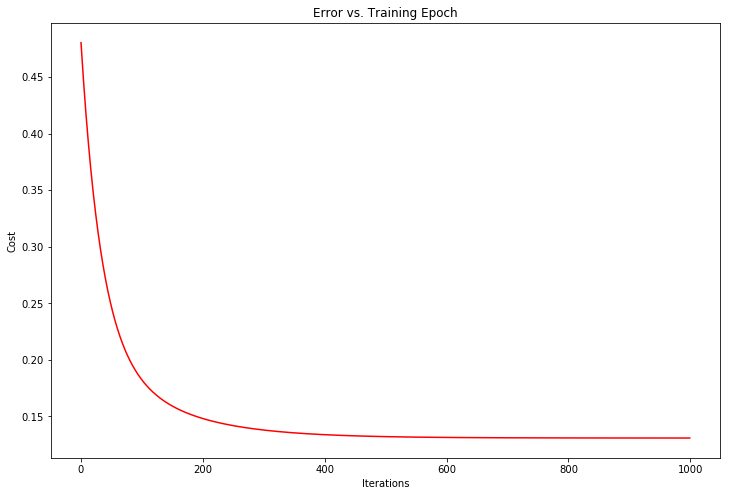

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
fig

---
# Using scikit learn's linear regression function
---

In [28]:
from sklearn import linear_model

In [29]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

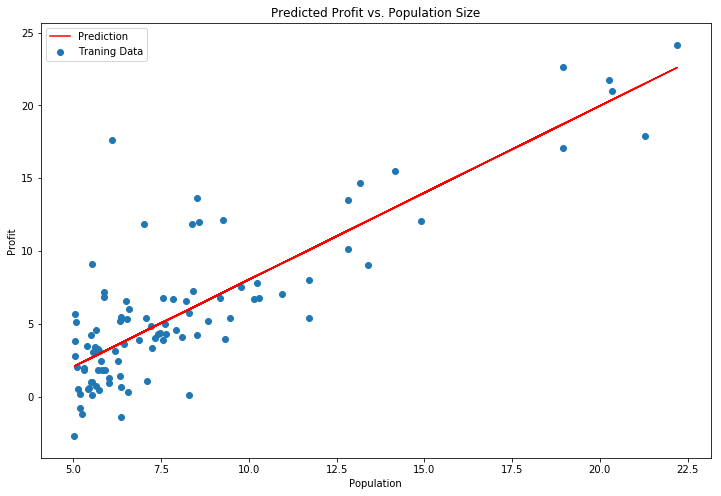

In [30]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
fig